# 8007 Final Project

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#MACHINE LEARNING LIBRARIES
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import  recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix


%matplotlib inline

# 1. Read & Clean up the Data from CSV file

In [2]:
Spotify_Dataset = pd.read_csv("Spotify-2000.csv")
Spotify_Dataset.head()

Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68               201            94            3          71  
1        17       81               207            17            7          39  
2         7       52               341             2           17          69  
3         3       37               269             0            4          76  
4        10       87               256             1            3          59

### Check for Null/NA values in the Dataset

There are no null or na values

In [3]:
Spotify_Dataset.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [4]:
Spotify_Dataset.isna().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [5]:
Spotify_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [6]:
print("Number of Tracks: ",Spotify_Dataset.shape[0])
print("Number of Attributes: ",Spotify_Dataset.shape[1])
print("Number of Artist: ",Spotify_Dataset["Artist"].nunique())
print("Number of Genres: ",Spotify_Dataset["Top Genre"].nunique())

Number of Tracks:  1994
Number of Attributes:  15
Number of Artist:  731
Number of Genres:  149


### Convert Length (Duration) to numeric data type

In [7]:
Spotify_Dataset['Length (Duration)']  = Spotify_Dataset['Length (Duration)'].str.replace(',', '')
Spotify_Dataset['Length (Duration)'] = pd.to_numeric(Spotify_Dataset['Length (Duration)'])

Spotify_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

### Add a columns "Decades" to indicate what decade the track was released

In [8]:
Spotify_Dataset.loc[(Spotify_Dataset.Year >1949) & (Spotify_Dataset.Year <1960), "Decade"] = "1950s"
Spotify_Dataset.loc[(Spotify_Dataset.Year >1959) & (Spotify_Dataset.Year <1970), "Decade"] = "1960s"
Spotify_Dataset.loc[(Spotify_Dataset.Year >1969) & (Spotify_Dataset.Year <1980), "Decade"] = "1970s"
Spotify_Dataset.loc[(Spotify_Dataset.Year >1979) & (Spotify_Dataset.Year <1990), "Decade"] = "1980s"
Spotify_Dataset.loc[(Spotify_Dataset.Year >1989) & (Spotify_Dataset.Year <2000), "Decade"] = "1990s"
Spotify_Dataset.loc[(Spotify_Dataset.Year >1999) & (Spotify_Dataset.Year <2010), "Decade"] = "2000s"
Spotify_Dataset.loc[(Spotify_Dataset.Year >2009) & (Spotify_Dataset.Year <2020), "Decade"] = "2010s"

Decades = list(Spotify_Dataset["Decade"].unique()).sort()
Spotify_Dataset.head()


Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence  Length (Duration)  Acousticness  Speechiness  \
0        11       68                201            94            3   
1        17       81                207            17            7   
2         7       52                341             2           17   
3         3       37                269             0            4   
4        10       87                256             1            3   

   Popularity Decade  
0          71  2000s  
1          39  2000s  
2          69  2000s  
3          76  2000s  
4          59  2000s

# 2. Exploratory Data Analysis + What are the Trend over the Years?

### Check for correlation between the numerical Music features.

Some notable Features Correlation are
   - There is a high positive correlation (0.74) between Loudness and Energy of the Tracks in this dataset.
   - There is a faily high positive correlation (0.51) between Valence and Danceability
   - There is a strong negative correlation (0.67) between Acousticness and Energy in this Dataset

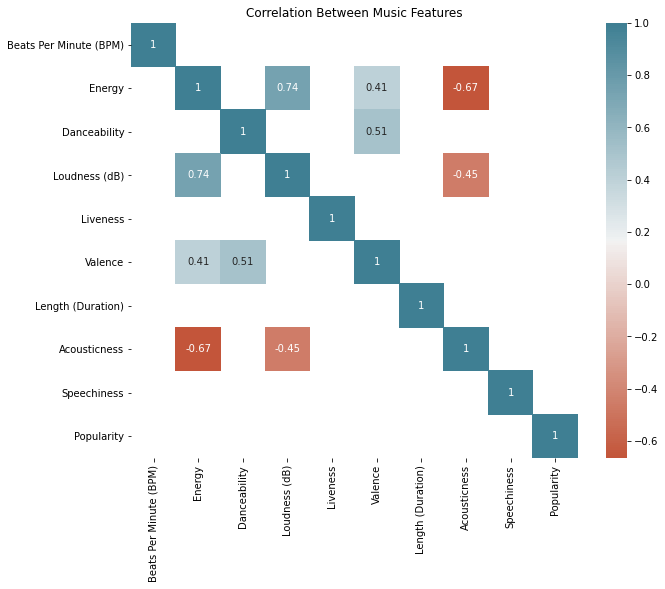

In [9]:
# plotting correlation heatmap
corr = Spotify_Dataset.loc[:,"Beats Per Minute (BPM)":"Popularity"].corr()
kot = corr[(corr>= 0.4) | (corr <= -0.4)]
plt.figure(figsize = (10,8))   
dataplot=sns.heatmap(kot,cmap=sns.diverging_palette(20, 220, n=200), annot=True)
plt.title('Correlation Between Music Features')
plt.show()

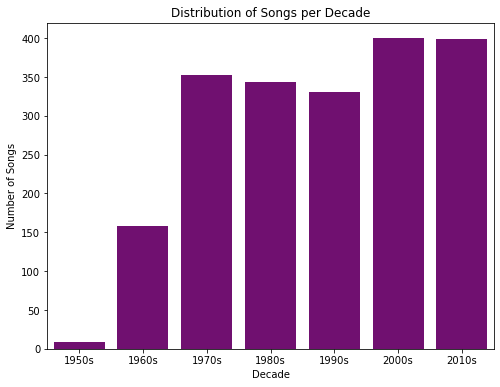

In [10]:
#THE NUMBER OF SONGS IN EACH DECADE
plt.figure(figsize = (8, 6))

sns.countplot(x=Spotify_Dataset['Decade'],color="purple",order=["1950s","1960s","1970s",
                                                  "1980s","1990s","2000s","2010s"])
plt.title("Distribution of Songs per Decade")
plt.ylabel("Number of Songs")
plt.show()

### Top 20 Genres in the dataset

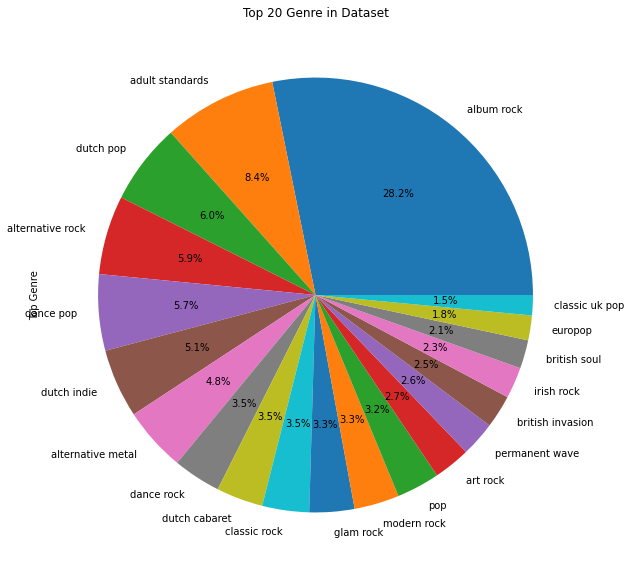

In [11]:
cmap = plt.get_cmap("Accent")(np.arange(6)*1)
Spotify_Dataset['Top Genre'].value_counts().head(20).plot.pie(figsize=(10,10),
                                                                  autopct='%1.1f%%')
plt.title('Top 20 Genre in Dataset')
plt.show()

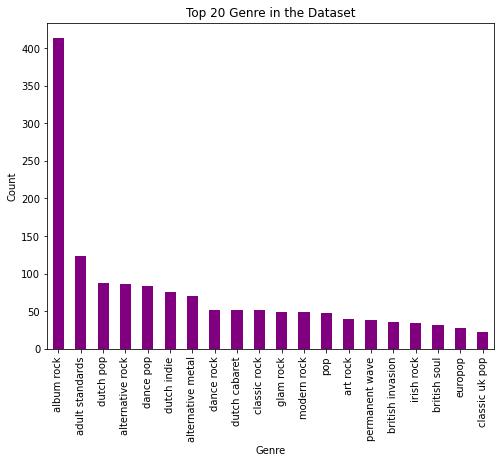

In [12]:
plt.figure(figsize = (8, 6))
Spotify_Dataset['Top Genre'].value_counts().head(20).plot(kind='bar',color="purple")
plt.title('Top 20 Genre in the Dataset')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.show()

### Check for distribution of Popularity & Create Popular dataset

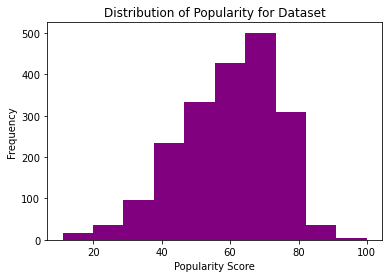

In [13]:
plt.hist(Spotify_Dataset["Popularity"],bins=10, color="purple")
plt.xlabel("Popularity Score")
plt.ylabel('Frequency')
plt.title("Distribution of Popularity for Dataset")
plt.show()

- Since we only want to explore the most popular track, we will create a new dataset with only the most popular tracks and another with the not so popular song. <br/>
- The Popular Dataset will only contains the tracks with Popularity Score greater than 65 and will be used for most of the EDA

In [14]:
Spotify_Dataset_Pop = Spotify_Dataset[Spotify_Dataset["Popularity"] >= 65]
Spotify_Dataset_NPop = Spotify_Dataset[Spotify_Dataset["Popularity"] < 65]

Spotify_Dataset_Pop.head()

Index               Title        Artist            Top Genre  Year  \
0      1             Sunrise   Norah Jones      adult standards  2004   
2      3      Clint Eastwood      Gorillaz  alternative hip hop  2001   
3      4       The Pretender  Foo Fighters    alternative metal  2007   
6      7   She Will Be Loved      Maroon 5                  pop  2002   
7      8  Knights of Cydonia          Muse          modern rock  2006   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
6                     102      71            71             -6        13   
7                     137      96            37             -5        12   

   Valence  Length (Duration)  Acousticness  Speechiness  Popularity Decade  
0       68                201            94            3          71  2000s  
2       52                341             2           17          69  2000s  
3       37                269             0            4          76  2000s  
6       54                257             6            3          74  2000s  
7       21                366             0           14          69  2000s

<b>Below is the new distributions after the split</b>

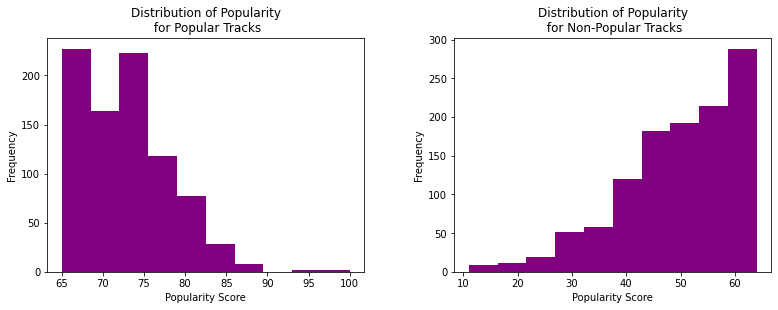

In [15]:
fig, axs = plt.subplots(1,2, figsize=(12,5.5))

axs[0].hist(Spotify_Dataset_Pop["Popularity"],bins=10, color="purple")
axs[0].set(xlabel="Popularity Score")
axs[0].set(ylabel='Frequency')
axs[0].set_title("Distribution of Popularity\n for Popular Tracks")


axs[1].hist(Spotify_Dataset_NPop["Popularity"],bins=10, color="purple")
axs[1].set(xlabel="Popularity Score")
axs[1].set(ylabel='Frequency')
axs[1].set_title("Distribution of Popularity\n for Non-Popular Tracks")

fig.tight_layout(pad=5.0)
plt.show()

#### Number of Song in each Decade for the classes

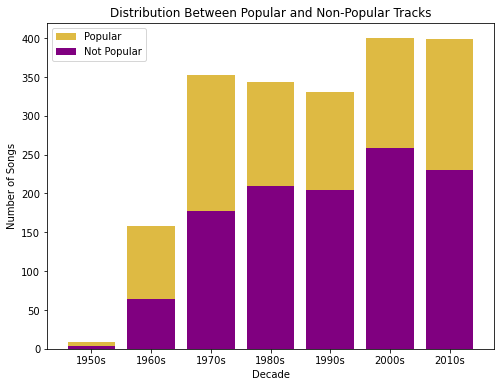

In [16]:
Decades = ["1950s","1960s","1970s","1980s","1990s","2000s","2010s"]
A = list(Spotify_Dataset_Pop.groupby('Decade').count().sort_values(by="Decade")["Title"])
B = list(Spotify_Dataset_NPop.groupby('Decade').count().sort_values(by="Decade")["Title"])

plt.figure(figsize = (8, 6))

plt.bar(Decades, A, bottom=B,color="#deba43",label="Popular")
plt.bar(Decades, B, color="purple",label="Not Popular")

plt.title("Distribution Between Popular and Non-Popular Tracks")
plt.xlabel("Decade")
plt.ylabel("Number of Songs")
plt.legend()
plt.show()


### Distribution of each feature

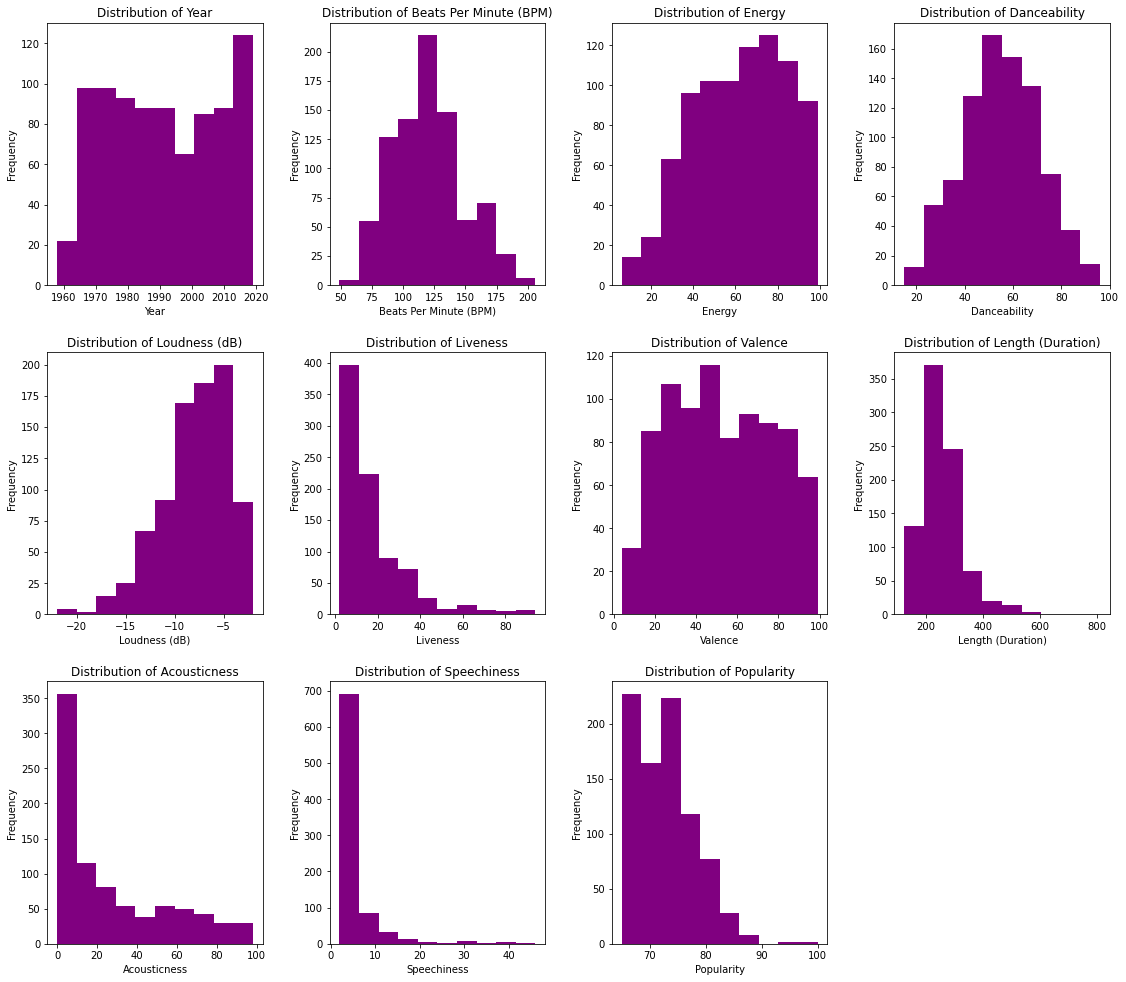

In [17]:
features = list(Spotify_Dataset_Pop.columns)
num_features = features[4:]
num_features.remove("Decade")


fig, axs = plt.subplots(3,4, figsize=(16,14))

idx =0 

for i in range(3):
    for j in range(4):
        axs[i,j].hist(Spotify_Dataset_Pop[num_features[idx]],bins=10,color='purple')
        axs[i,j].set(xlabel=num_features[idx])
        axs[i,j].set(ylabel='Frequency')
        axs[i,j].set_title("Distribution of " + str(num_features[idx]))
        idx +=1
        
        if idx == len(num_features):
                break;
            
axs[2][3].set_axis_off()

fig.tight_layout(pad=2.0)
#plt.savefig("distribution.jpg",transparent = False)
plt.show()   


### Trends in Attributes over the Years

The line plots are coloured as follow
  - Green for upward trends over the years
  - Red for downward trends over the years
  - Blue for no particular trend over the years

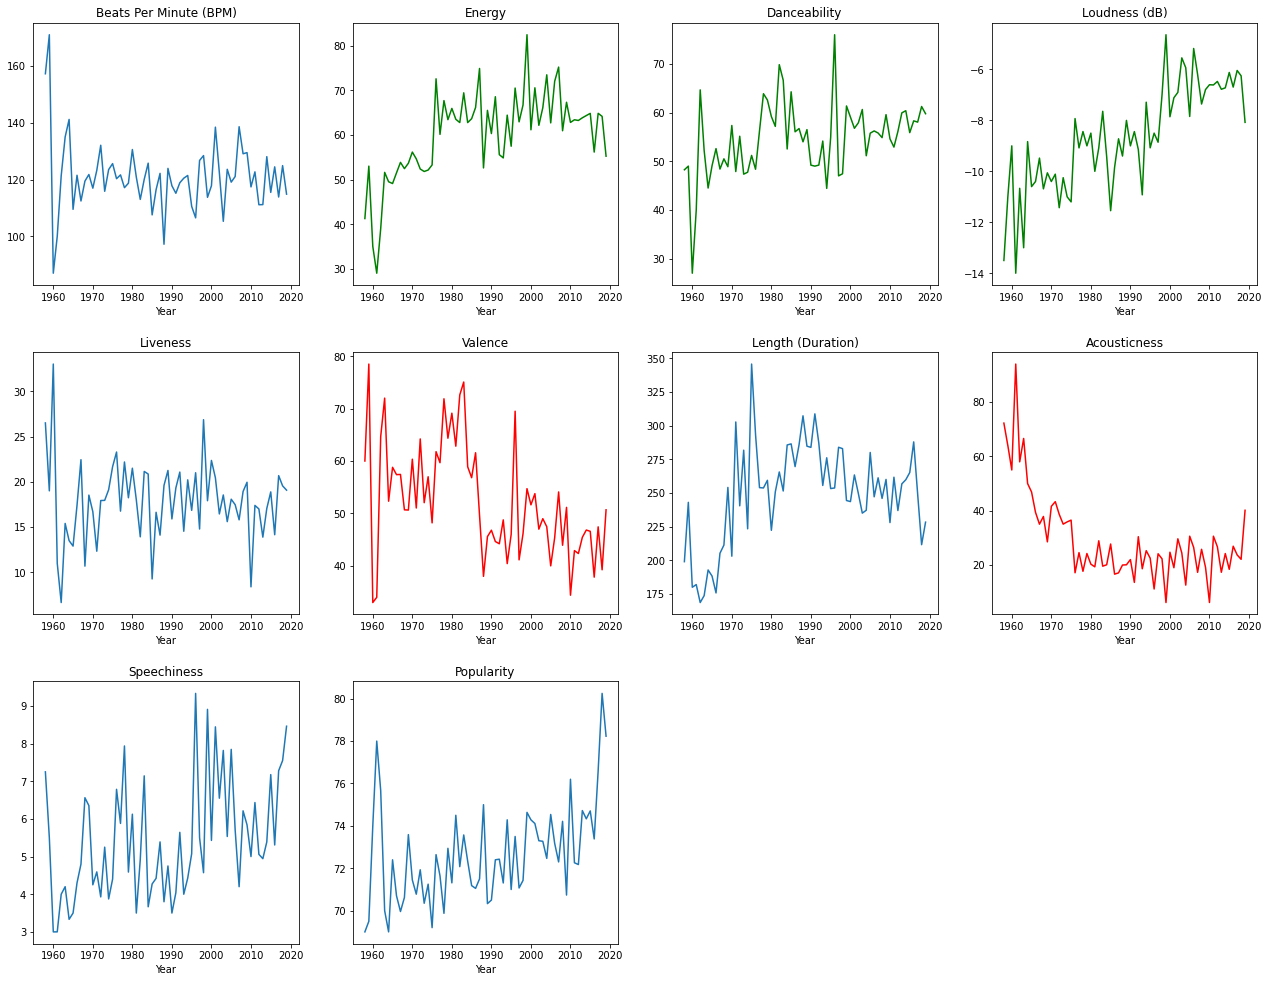

In [18]:
features_avgs = Spotify_Dataset_Pop.groupby('Year').mean()
column_names = features_avgs.columns[1:]

colours = ["#1f77b4","green","green","green",
           "#1f77b4","red","#1f77b4", "red",
           "#1f77b4","#1f77b4"]
fig, axs = plt.subplots(3,4, figsize=(18,14))

idx = 0
for i in range(3):
    for j in range(4):
        axs[i,j].plot(features_avgs.index, features_avgs[column_names[idx]],c=colours[idx])
        axs[i,j].set(xlabel= "Year")
        #axs[i,j].set(ylabel=column_names[idx])
        axs[i,j].set_title(column_names[idx])
        idx +=1
        
        if idx == len(column_names):
                break;
                
axs[2][2].set_axis_off()
axs[2][3].set_axis_off()

fig.tight_layout(pad=2.0)
#plt.savefig("distribution.jpg",transparent = False)
plt.show()   


### Visualizing Correlation among features
Exploring some feature correlation such as Acousticness, Energy, Loudness as we've seen earlier that these variable have high positive or negative correlation

In [19]:
top10_all = pd.DataFrame([])
Decades = list(Spotify_Dataset["Decade"].unique())

for Decade in Decades:
    if Decade != "1950s":
        temp_df = Spotify_Dataset[Spotify_Dataset["Decade"] == Decade].sort_values(by="Popularity",
                                                                                ascending=False).head(15)
        
        top10_all = pd.concat([top10_all, temp_df])


fig = px.scatter(top10_all, x = "Acousticness", y = "Energy", size='Energy', 
                 color = "Decade", title = 'Acousticness vs Energy',
                 hover_name='Title',hover_data=['Artist','Year',"Top Genre"],
                 color_discrete_sequence=["pink", "orange", "green", "blue", "purple","red"])
fig.show()

#Image has been embedded as plotly plots may not be visible

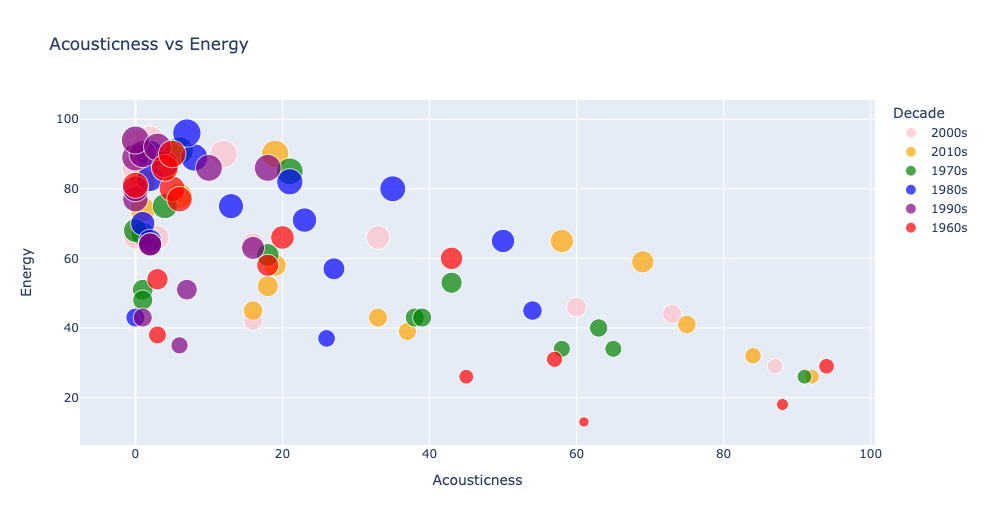

In [20]:
fig = px.scatter(top10_all,x='Energy', y='Loudness (dB)',size="Energy",
                 color='Loudness (dB)',hover_name='Title',
                 hover_data=['Artist','Year'],
                 title = 'Energy vs Loudness')
fig.show()
#Image has been embedded as plotly plots may not be visible

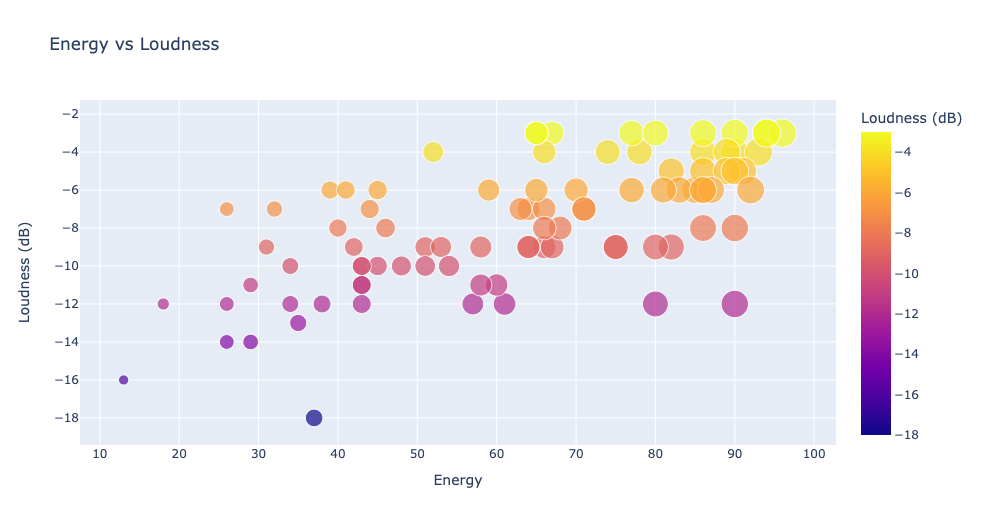

### Most Popular Genre by Decade

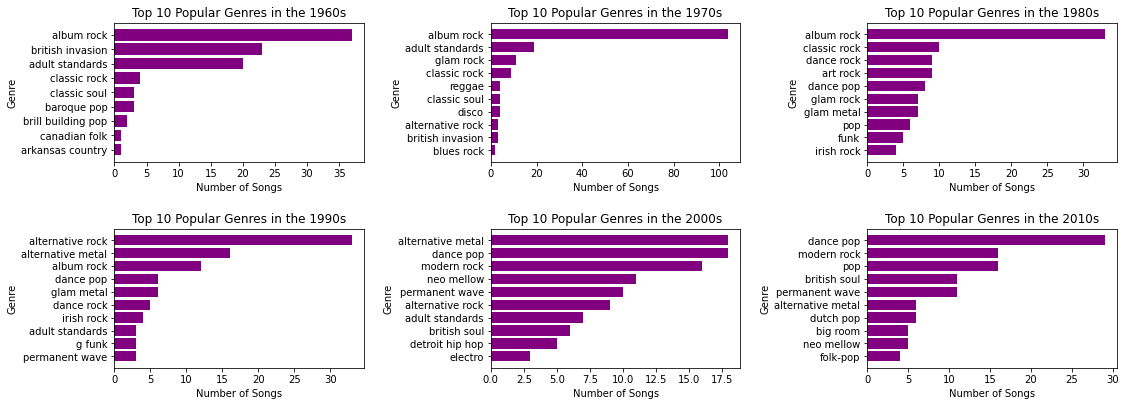

In [21]:
Decades = list(Spotify_Dataset_Pop["Decade"].sort_values().unique())[1:]
    
fig, axs = plt.subplots(2,3, figsize=(16,6))
idx = 0
for i in range(2):
    for j in range(3):
        df = Spotify_Dataset_Pop[Spotify_Dataset_Pop["Decade"] == Decades[idx]]
        df = df['Top Genre'].value_counts().head(10).sort_values()
        axs[i,j].barh(df.index,df.values, color = 'purple')
        axs[i,j].set(xlabel= "Number of Songs")
        axs[i,j].set(ylabel="Genre")
        axs[i,j].set_title("Top 10 Popular Genres in the " +Decades[idx])
        idx +=1
        if idx == len(Decades):
                break;
fig.tight_layout(pad=2.0)
plt.show()   

#### Create a new dataframe with only top 10 Genres in each decade

In [22]:
top10_all = pd.DataFrame([])

for Decade in Decades:
    if Decade != "1950s":
        temp_df = pd.DataFrame([])
        
        df = Spotify_Dataset_Pop[Spotify_Dataset_Pop["Decade"] == Decade]
        df = df['Top Genre'].value_counts().head(10)
        
        temp_df["Genre"] = df.index
        temp_df["Count"] = df.values
        temp_df["Decade"] = Decade
        
        top10_all = pd.concat([top10_all, temp_df])
        
top10_all.head(5)      

Genre  Count Decade
0        album rock     37  1960s
1  british invasion     23  1960s
2   adult standards     20  1960s
3      classic rock      4  1960s
4       baroque pop      3  1960s

### Visualize the distribution of the top 10 Genres
Visualizing the distribution of the Top 10 Genre for each decade, in order to see which Genre is more dominant over time

In [23]:
import plotly.express as px

colors=['#fae588','#f79d65','purple','lightblue','pink','#ef233c','blue'] #color palette

fig = px.treemap(top10_all, path=['Decade','Genre'],
                 values='Count', width=1000, height=500,
                 title="Genre Distribution by Decade")
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))
fig.update_traces(textinfo='label+percent parent')
fig.show()
#Image has been embedded as plotly plots may not be visible

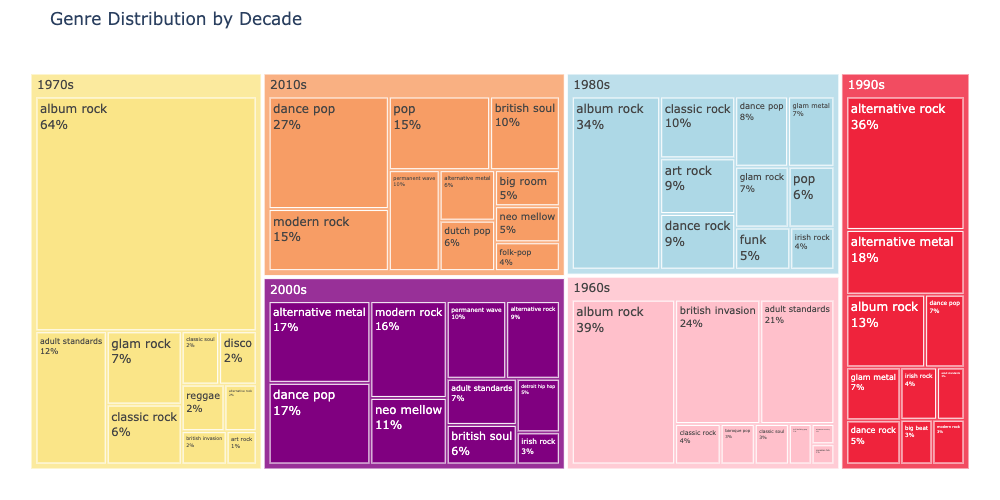

#### Pop & Rock Music Popularity over the years
The below shows that Rock Music was very popular in the 1960s all the way to the 1990s. Pop Music started seeing an increase in popularity from the 1980s and eventaully became the dominate genre from the 2000s up until now

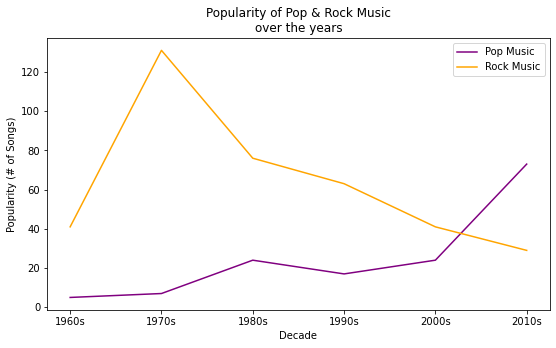

In [62]:
Pop_Genre = Spotify_Dataset_Pop[Spotify_Dataset_Pop['Top Genre'].
                                str.contains('pop')].sort_values(by="Decade")
Pop_Genre_group = Pop_Genre.groupby('Decade').count()

Rock_Genre = Spotify_Dataset_Pop[Spotify_Dataset_Pop['Top Genre'].
                                 str.contains('rock')].sort_values(by="Decade").iloc[1:,:]
Rock_Genre_group = Rock_Genre.groupby('Decade').count()

plt.figure(figsize = (9, 5))
plt.plot(Pop_Genre_group.index, Pop_Genre_group["Top Genre"],c="purple",label="Pop Music")
plt.plot(Rock_Genre_group.index, Rock_Genre_group["Top Genre"],c="orange",label="Rock Music")

plt.xlabel("Decade")
plt.ylabel('Popularity (# of Songs)')
plt.legend()
plt.title("Popularity of Pop & Rock Music\nover the years")
plt.show()

### Check for the most popular song in each Decade

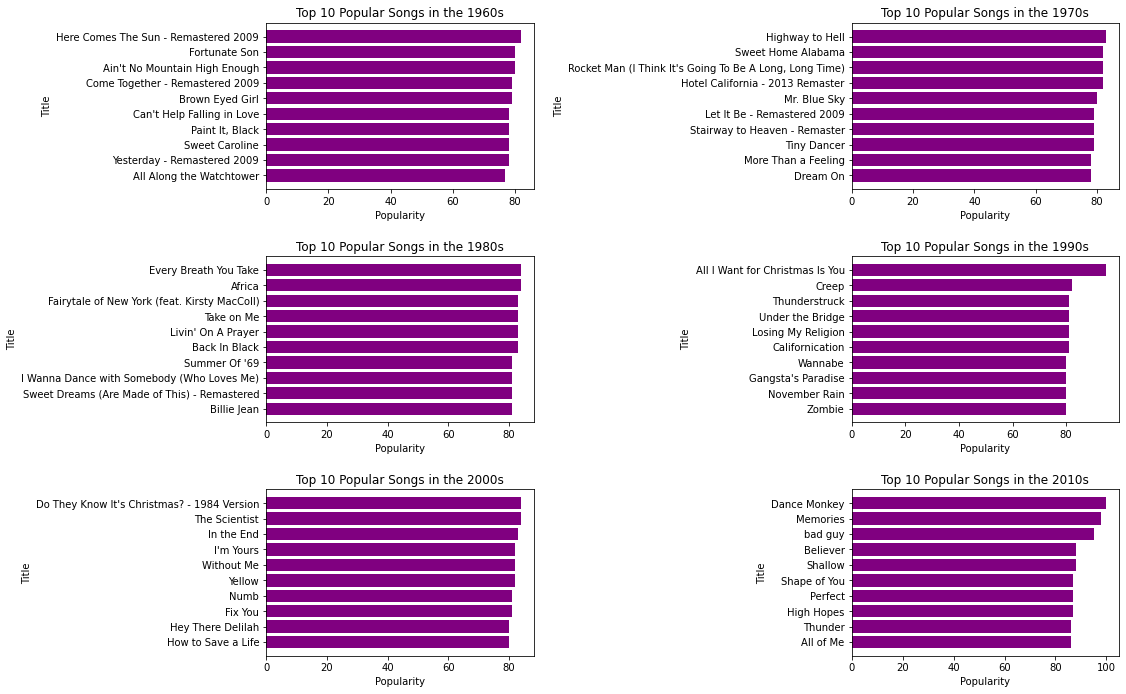

In [25]:
Decades = list(Spotify_Dataset_Pop["Decade"].sort_values().unique())[1:]
    
fig, axs = plt.subplots(3,2, figsize=(16,10))
idx = 0
for i in range(3):
    for j in range(2):
        df = Spotify_Dataset_Pop[Spotify_Dataset_Pop["Decade"] == Decades[idx]]
        df = df.sort_values(by="Popularity",ascending=False).head(10).sort_values(by="Popularity")
        axs[i,j].barh(df.Title,df.Popularity, color = 'purple')
        axs[i,j].set(xlabel= "Popularity")
        axs[i,j].set(ylabel="Title")
        axs[i,j].set_title("Top 10 Popular Songs in the " +Decades[idx])
        idx +=1
        if idx == len(Decades):
                break;

fig.tight_layout(pad=2.0)
plt.show()  

### Check for the most popular Artist in each Decade

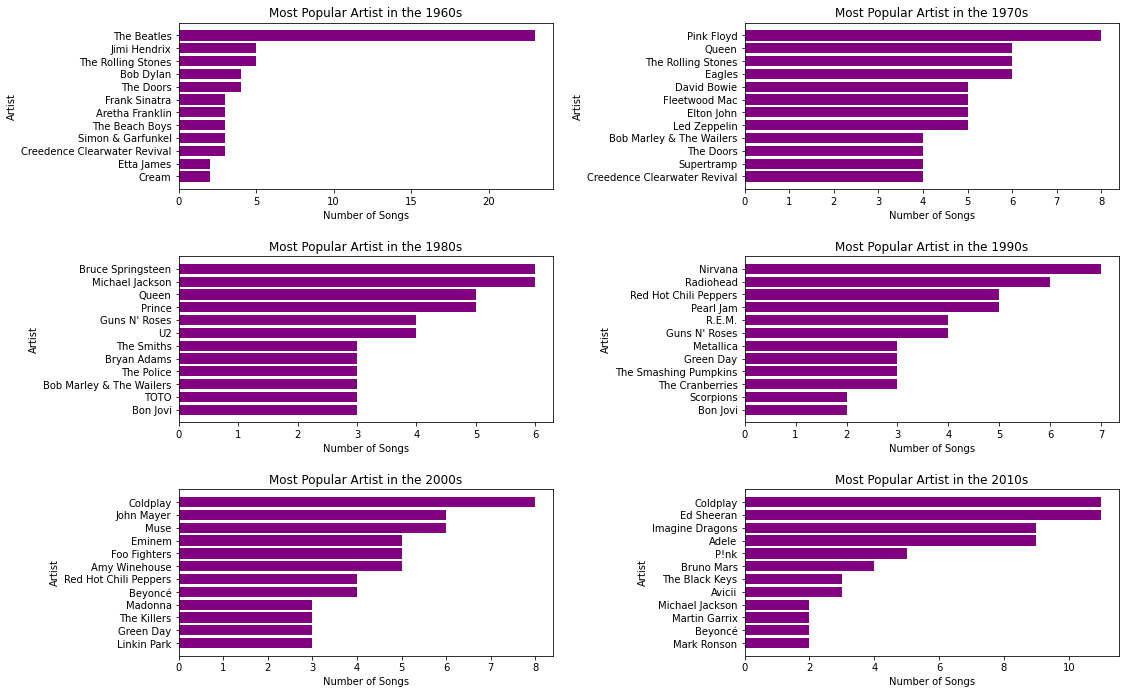

In [26]:
Decades = list(Spotify_Dataset_Pop["Decade"].sort_values().unique())[1:]
    
fig, axs = plt.subplots(3,2, figsize=(16,10))
idx = 0
for i in range(3):
    for j in range(2):
        df = Spotify_Dataset_Pop[Spotify_Dataset_Pop["Decade"] == Decades[idx]]
        df = df['Artist'].value_counts().head(12).sort_values()
        axs[i,j].barh(df.index,df.values, color = 'purple')
        axs[i,j].set(xlabel= "Number of Songs")
        axs[i,j].set(ylabel="Artist")
        axs[i,j].set_title("Most Popular Artist in the " +Decades[idx])
        idx +=1
        if idx == len(Decades):
                break;
fig.tight_layout(pad=2.0)
plt.show() 

# 3. Predicting Music Popularity in Current times
It is important for Artist, Manager and Individuals seeking profit in the industry to understand trends in current times </br>
By predicting music popularity, will see what makes a hit song in our current times.<br/>
3 Machine Learning Algorithms will be used to predict Music Popularity
 - Decision Tree
 - Random Forest
 - Logistic Regression
 
We will then determine the feature importance using the best performing Algorithm

### Get Data for Current times (From year 2000)

In [27]:
Spotify_Dataset_Current = Spotify_Dataset[(Spotify_Dataset.Year >= 2000)].copy()

Spotify_Dataset_Current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 798
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   799 non-null    int64 
 1   Title                   799 non-null    object
 2   Artist                  799 non-null    object
 3   Top Genre               799 non-null    object
 4   Year                    799 non-null    int64 
 5   Beats Per Minute (BPM)  799 non-null    int64 
 6   Energy                  799 non-null    int64 
 7   Danceability            799 non-null    int64 
 8   Loudness (dB)           799 non-null    int64 
 9   Liveness                799 non-null    int64 
 10  Valence                 799 non-null    int64 
 11  Length (Duration)       799 non-null    int64 
 12  Acousticness            799 non-null    int64 
 13  Speechiness             799 non-null    int64 
 14  Popularity              799 non-null    int64 
 15  Decade

### Wordcloud for Popular Genres in Current Time Genre
The Wordcloud shows visually represents the most Popular Genre in recent times

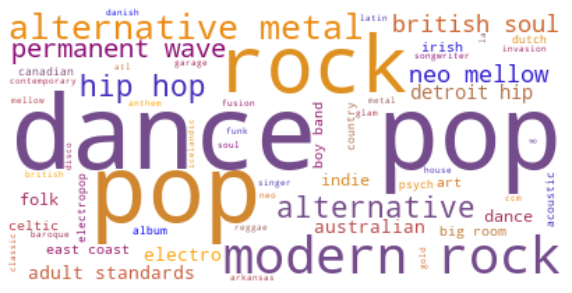

In [61]:
current_pop = Spotify_Dataset_Current[Spotify_Dataset_Current["Popularity"] > 70]
era_word = " ".join(review for review in current_pop["Top Genre"])
stopwords = set(STOPWORDS)

colors = ["purple", "orange","blue"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wordcloud_usa = WordCloud(max_font_size = 100,
                          stopwords=stopwords, 
                          background_color="white", 
                          max_words=100,
                          colormap=cmap).generate(era_word)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_usa, interpolation="bilinear")
plt.axis("off")

plt.show()

<b>This Dataset makes use of varying popularity for more accurate predictions</b><br/>
Below is the distribution of popularity

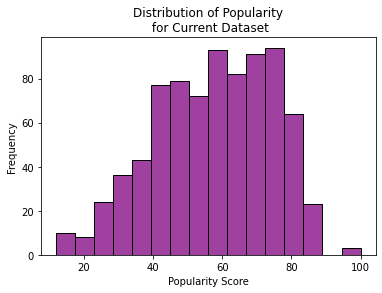

In [29]:
plt.figure(figsize = (6, 4))
sns.histplot(Spotify_Dataset_Current['Popularity'],color="purple")
plt.xlabel("Popularity Score")
plt.ylabel('Frequency')
plt.title("Distribution of Popularity\n for Current Dataset")
plt.show()

### Predictive Analysis - What makes a song Popular?
A predictive analysis will be performed on the Music Dataset so that we can see what makes a Hit Song!

#### Get Feature Values
For Model Feature Selection, the variables uses are based on the qualitative attributes such as the BPM, Energy, Danceabilty, Loudness, Liveness, Valence, Duration, Acousticness and Speechiness.<br/>
The model is not dependent on the artist information.

In [30]:
Features = Spotify_Dataset_Current.loc[:,"Beats Per Minute (BPM)":"Speechiness"]
feature_name = Features.columns
Features.head()

Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence  Length (Duration)  Acousticness  Speechiness  
0       68                201            94            3  
1       81                207            17            7  
2       52                341             2           17  
3       37                269             0            4  
4       87                256             1            3

#### Get the Target Values
 - Tracks with Popularity Score equal to or greater than 60 have classified as Popular
 - Tracks with Popularity Score less than 60 are classifies as Not Popular

In [31]:
Spotify_Dataset_Current.loc[(Spotify_Dataset_Current["Popularity"] < 60), "Pop"] = 0
Spotify_Dataset_Current.loc[(Spotify_Dataset_Current["Popularity"] >= 60), "Pop"] = 1

Target = Spotify_Dataset_Current['Pop']

<b>Distrbution of Popularity classes

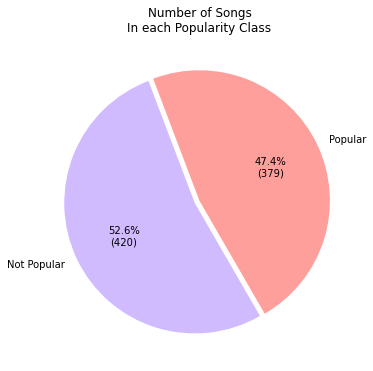

In [32]:
true_count = Spotify_Dataset_Current[Spotify_Dataset_Current['Pop'] == 1].shape[0]
false_count = Spotify_Dataset_Current[Spotify_Dataset_Current['Pop'] == 0].shape[0]

total = Spotify_Dataset_Current.shape[0]
data = [true_count, false_count]
labels = ['Popular', 'Not Popular']

explode = [0,0.04]

#define Seaborn color palette to use
plt.figure(figsize = (8, 6))
colors = sns.color_palette('pastel')[3:5]

#create pie chart
plt.pie(data, labels = labels, 
        colors = colors, 
        autopct=lambda x: '{:.1f}%\n({})'.format(x, format(int((total*x/100).round(0)),",")),
        startangle = 300,explode =explode)

plt.title("Number of Songs\nIn each Popularity Class")
plt.show()

#### Normalize and Split the Data into training and test set

In [33]:
#NORMALIZE THE DATA FEATURES
mean = Features.mean(axis=0)
Features -= mean
std = Features.std(axis=0)
Features /= std
display(Features.head())


Target = Target.values
Features = Features.values

Beats Per Minute (BPM)    Energy  Danceability  Loudness (dB)  Liveness  \
0                1.247921 -1.553540     -0.072473      -2.224025 -0.482455   
1                0.480661  0.771840     -0.272839      -1.195075 -0.140109   
2                1.631551  0.297273      0.795781      -0.509109 -0.710685   
3                1.805928  1.578605     -0.740360       1.205807 -0.938916   
4               -0.530727  0.914210      0.261471       0.862824 -0.539512   

    Valence  Length (Duration)  Acousticness  Speechiness  
0  0.934101          -0.733506      2.286000    -0.479963  
1  1.477294          -0.644568     -0.320115     0.348310  
2  0.265556           1.341711     -0.827799     2.418993  
3 -0.361205           0.274457     -0.895490    -0.272895  
4  1.727998           0.081758     -0.861645    -0.479963

In [34]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size = 0.2, random_state = 1)

#### Using Random Forest

In [35]:
Final_df = pd.DataFrame([])

RF_Model = RandomForestClassifier(random_state=10)
RF_Model.fit(X_train, y_train)
RF_Predict = RF_Model.predict(X_test)

RF_Accuracy = accuracy_score(y_test, RF_Predict)
print("Accuracy: ",RF_Accuracy)

RF_Precision = precision_score(y_test, RF_Predict) 
print("Precision: ",RF_Precision)

RF_Recall = recall_score(y_test, RF_Predict) 
print("Recall: ",RF_Recall)
            
temp_df = pd.DataFrame([])
temp_df["Measure"] = ["Accuracy","Precision","Recall"]
temp_df["Values"] = [RF_Accuracy, RF_Precision, RF_Recall]
temp_df["Model"] = "Random Forest"


Final_df = pd.concat([Final_df, temp_df])

Accuracy:  0.60625
Precision:  0.5733333333333334
Recall:  0.581081081081081


#### Using Logistic Regression

In [36]:
LR_Model = LogisticRegression(random_state=20)
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_test)

LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Accuracy: " ,LR_Accuracy)

LR_Precision = precision_score(y_test, LR_Predict) 
print("Precision: ",LR_Precision)

LR_Recall = recall_score(y_test, LR_Predict) 
print("Recall: ",LR_Recall)

temp_df = pd.DataFrame([])
temp_df["Measure"] = ["Accuracy","Precision","Recall"]
temp_df["Values"] = [LR_Accuracy, LR_Precision, LR_Recall]
temp_df["Model"] = "Logistic Regression"


Final_df = pd.concat([Final_df, temp_df])

Accuracy:  0.65
Precision:  0.618421052631579
Recall:  0.6351351351351351


#### Using Decision Tree

In [37]:
DT_Model = DecisionTreeClassifier(random_state=10)
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_test)

DT_Accuracy = accuracy_score(y_test, DT_Predict)
print("Accuracy: ",DT_Accuracy)

DT_Precision = precision_score(y_test, DT_Predict) 
print("Precision: ",DT_Precision)

DT_Recall = recall_score(y_test, DT_Predict) 
print("Recall: ",DT_Recall)

temp_df = pd.DataFrame([])
temp_df["Measure"] = ["Accuracy","Precision","Recall"]
temp_df["Values"] = [DT_Accuracy, DT_Precision, DT_Recall]
temp_df["Model"] = "Decision Tree"


Final_df = pd.concat([Final_df, temp_df])
Final_df

Accuracy:  0.5875
Precision:  0.5645161290322581
Recall:  0.47297297297297297


Measure    Values                Model
0   Accuracy  0.606250        Random Forest
1  Precision  0.573333        Random Forest
2     Recall  0.581081        Random Forest
0   Accuracy  0.650000  Logistic Regression
1  Precision  0.618421  Logistic Regression
2     Recall  0.635135  Logistic Regression
0   Accuracy  0.587500        Decision Tree
1  Precision  0.564516        Decision Tree
2     Recall  0.472973        Decision Tree

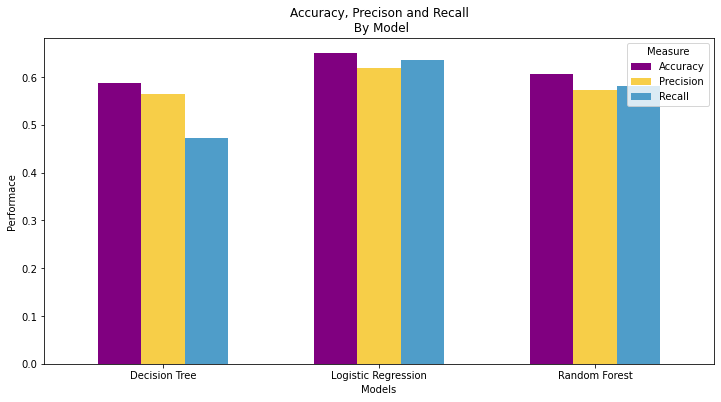

In [43]:
Model_group = Final_df.groupby(["Model","Measure"]).mean()
Model_group = Model_group["Values"]
stack = Model_group.unstack("Measure")
stack.plot.bar(width=0.6,color=["purple","#f7ce48","#4f9dc9"])
plt.title('Accuracy, Precison and Recall\n By Model')
plt.ylabel('Performace')
plt.xlabel('Models')
plt.xticks(rotation = 0)
plt.rcParams['figure.figsize'] = [12, 6]
plt.show()

### Model Evaluation
Since the Logistic Regression model had the highest Accuracy, we will evaluate the feature importance using this model

#### Confusion Matrix

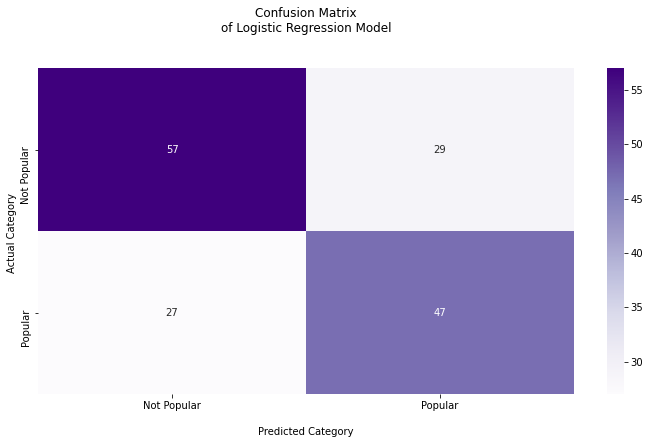

In [39]:
cf_matrix = confusion_matrix(y_test, LR_Predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Purples')

ax.set_title('Confusion Matrix\nof Logistic Regression Model\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

ax.xaxis.set_ticklabels(['Not Popular','Popular'])
ax.yaxis.set_ticklabels(['Not Popular','Popular'])

plt.show()

#### Most Important Features

In [40]:
model_feature_importance = LR_Model.coef_[0]
model_feature_importance = np.absolute(model_feature_importance)

In [41]:
#Plot Feature Importance
feature_imp_df = [feature_name,model_feature_importance]
feature_imp_df = pd.DataFrame(feature_imp_df).transpose()
feature_imp_df.columns = ["Feature","Importance"]
feature_imp_df = feature_imp_df.sort_values(by="Importance",ascending =True)

display(feature_imp_df)

Feature  Importance
0  Beats Per Minute (BPM)  0.00651117
7            Acousticness   0.0886491
6       Length (Duration)   0.0888338
5                 Valence    0.241313
4                Liveness    0.251516
8             Speechiness    0.385565
1                  Energy    0.387711
2            Danceability    0.388348
3           Loudness (dB)    0.766388

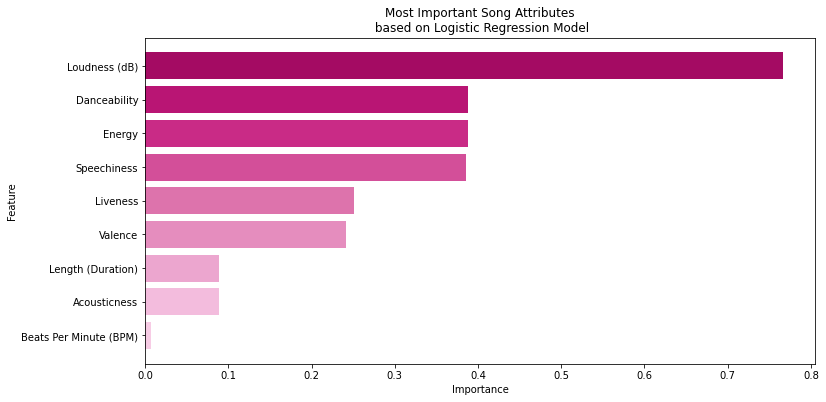

In [42]:
cmap = plt.get_cmap("PiYG")(np.flip(np.arange(10)*10))
feature_imp_df = feature_imp_df.sort_values(by="Importance",ascending =True)
plt.barh(feature_imp_df["Feature"],feature_imp_df["Importance"],color=cmap)
plt.title('Most Important Song Attributes\n based on Logistic Regression Model')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()
plt.show()

# 4. Conclusion

Using the above visualizations, we have seen Trends in Music Popularity over the Year
   - People tend to listen to Danceable, Energetic and Loud Music in current time<br/>
   - We also find that attribute such as Loudness, Danceability and Energy also impact the popularity of a song
   - Song with high Valence and Acoustic are not as popular as they used to be in the past. However it has little impact on the popularity of the song as we have seen in the modelling<br/>

   
Pop Music has become dominant in current time, it is no coincidence that they tend to be high in Energy and Danceability, which are the song features people prefer in current times <br/> 

Artist looking to be successful in the Music Industry should consider making these sort of high energy, high Danceability Music as they tends to be liked by the majority audience 

